<a href="https://colab.research.google.com/github/ShireenKachroo/Student-Performance-Analysis/blob/main/Student_Performance_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Student Performance Dataset ML Project

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
#UCI repo link
url = "https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-mat.csv"
df = pd.read_csv(url, sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [11]:
# Target variable: predict if student passed or failed
df['pass'] = (df['G3'] >= 10).astype(int)

# Drop G1, G2, G3 (to avoid data leakage)
df = df.drop(['G1', 'G2', 'G3'], axis=1)

# Encode categorical columns
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])

# Split features and target
X = df.drop('pass', axis=1)
y = df['pass']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
#Logistic Regression
log_reg = LogisticRegression(max_iter=500, solver='lbfgs')
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

print("\n Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


 Logistic Regression
Accuracy: 0.6835443037974683
              precision    recall  f1-score   support

           0       0.53      0.35      0.42        26
           1       0.73      0.85      0.78        53

    accuracy                           0.68        79
   macro avg       0.63      0.60      0.60        79
weighted avg       0.66      0.68      0.66        79



In [13]:

# Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\nDecision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree
Accuracy: 0.6582278481012658
              precision    recall  f1-score   support

           0       0.47      0.27      0.34        26
           1       0.70      0.85      0.77        53

    accuracy                           0.66        79
   macro avg       0.58      0.56      0.56        79
weighted avg       0.63      0.66      0.63        79



In [14]:
#Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest ")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest 
Accuracy: 0.6708860759493671
              precision    recall  f1-score   support

           0       0.50      0.27      0.35        26
           1       0.71      0.87      0.78        53

    accuracy                           0.67        79
   macro avg       0.60      0.57      0.56        79
weighted avg       0.64      0.67      0.64        79



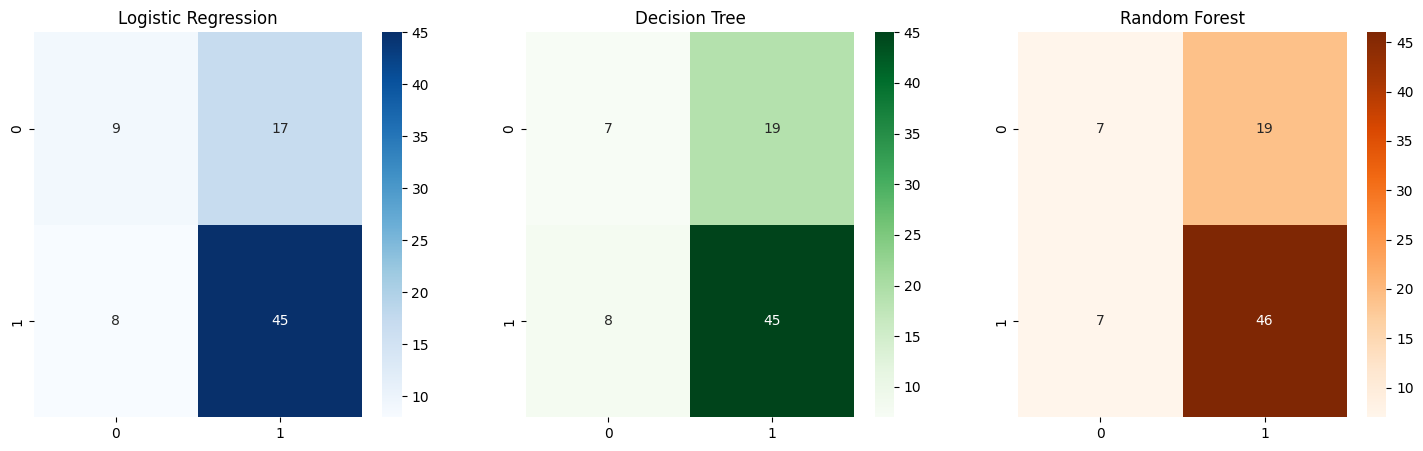

In [15]:
#Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression")
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap="Greens", ax=axes[1])
axes[1].set_title("Decision Tree")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap="Oranges", ax=axes[2])
axes[2].set_title("Random Forest")
plt.show()
